In [689]:
import numpy as np
import matplotlib.pyplot as plt

In [690]:
A = np.array([[1,2,1,-1],[-1,1,0,2],[0,-1,-2,1]])
A

array([[ 1,  2,  1, -1],
       [-1,  1,  0,  2],
       [ 0, -1, -2,  1]])

In [691]:
b = np.array([3,2,-2]).reshape(3,1)
b

array([[ 3],
       [ 2],
       [-2]])

In [692]:
A_transpose = A.T
A_transpose

array([[ 1, -1,  0],
       [ 2,  1, -1],
       [ 1,  0, -2],
       [-1,  2,  1]])

In [693]:
w0 = -A_transpose@b
w0

array([[ -1],
       [-10],
       [ -7],
       [  1]])

In [694]:
w1 = A_transpose@A
w1

array([[ 2,  1,  1, -3],
       [ 1,  6,  4, -1],
       [ 1,  4,  5, -3],
       [-3, -1, -3,  6]])

x = np.array([1,1,1,1]).reshape(4,1)
x
w1@x
h = w0 + w1@x + 0.2*x
h
h_2norm = np.linalg.norm(h, ord=2)
h_2norm

In [695]:
x0 = np.array([1,1,1,1]).reshape(4,1)
past_x = x0
past_x
_x0 = x0.reshape(1,4)

#while True:
for i in range(1,5):
    h = h = w0 + w1@past_x + 0.2*past_x
    x = past_x - 0.1*h
    past_x = x
    _x = x.reshape(1,4)
    #print(x.reshape(1,4))
    print(_x)
    print(_x[0])
    print("\n\n")

In [323]:
#Past Answer
print("k={},    x(k) = {}".format(0,_x0[0]))
k = 1
while True:
    h = h = w0 + w1@past_x + 0.2*past_x
    h_2norm = np.linalg.norm(h, ord=2)
    print("h_2norm is {}\n".format(h_2norm))
    if h_2norm < 0.001:
        break
        
    x = past_x - 0.1*h
    past_x = x
    _x = x.reshape(1,4)
    print("k={},    x(k) = {}".format(k,_x[0]))
    k = k + 1
#print("h_2norm is {}".format(h_2norm))

k=0,    x(k) = [1 1 1 1]
h_2norm is 0.4000000000000001

k=1,    x(k) = [0.98 0.98 0.98 0.98]
h_2norm is 0.28422526277584853

k=2,    x(k) = [0.9624 0.9804 0.9744 0.9584]
h_2norm is 0.26032987074095054

k=3,    x(k) = [0.942712 0.982392 0.966832 0.943272]
h_2norm is 0.25086087140851654

k=4,    x(k) = [0.92337456 0.98663216 0.95983296 0.92954576]
h_2norm is 0.24421442641331964

k=5,    x(k) = [0.90444937 0.99160416 0.95259323 0.91685286]
h_2norm is 0.23841255000803413

k=6,    x(k) = [0.88610663 0.99701264 0.94521401 0.90467728]
h_2norm is 0.2330349866994783

k=7,    x(k) = [0.86834369 1.00263626 0.93769019 0.89287482]
h_2norm is 0.22794962322464263

k=8,    x(k) = [0.85113788 1.00837882 0.93006486 0.88136622]
h_2norm is 0.22309102946502152

k=9,    x(k) = [0.83445305 1.01418084 0.92237569 0.87011787]
h_2norm is 0.21841725452905583

k=10,    x(k) = [0.81825308 1.02000493 0.91465805 0.85911149]
h_2norm is 0.213898890090292

k=11,    x(k) = [0.80250456 1.02582449 0.90694203 0.8483362 ]
h_

In [331]:
gd = []
gd.append(_x0)
while True:
    h = h = w0 + w1@past_x + 0.2*past_x
    h_2norm = np.linalg.norm(h, ord=2)
    if h_2norm < 0.001:
        break
        
    x = past_x - 0.1*h
    past_x = x
    _x = x.reshape(1,4)
    gd.append(_x)

In [332]:
length = len(gd)
length

277

In [355]:
for i in range(0,5):
    print("k={},      x(k)=[{},{},{},{}]".format(i,round(gd[i][0][0],4),round(gd[i][0][1],4),round(gd[i][0][2],4),round(gd[i][0][3],4)))

for j in range(length-5,length):
    print("k={},    x(k)=[{},{},{},{}]".format(j,round(gd[j][0][0],4),round(gd[j][0][1],4),round(gd[j][0][2],4),round(gd[j][0][3],4)))


 

k=0,      x(k)=[1,1,1,1]
k=1,      x(k)=[0.98,0.98,0.98,0.98]
k=2,      x(k)=[0.9624,0.9804,0.9744,0.9584]
k=3,      x(k)=[0.9427,0.9824,0.9668,0.9433]
k=4,      x(k)=[0.9234,0.9866,0.9598,0.9295]
k=272,    x(k)=[0.0666,1.3366,0.4928,0.3251]
k=273,    x(k)=[0.0666,1.3366,0.4928,0.325]
k=274,    x(k)=[0.0665,1.3366,0.4927,0.325]
k=275,    x(k)=[0.0664,1.3367,0.4927,0.3249]
k=276,    x(k)=[0.0663,1.3367,0.4927,0.3249]


# (d)

In [696]:
x_hat = np.linalg.inv(w1+0.2*np.identity(4))@A_transpose@b
x_hat

array([[0.06285483],
       [1.33819951],
       [0.49067315],
       [0.32238443]])

In [701]:
#*******************
def gradient(_x0,w0,w1,past_x,alpha):
    k=0
    
    gd = []
    gd.append(_x0)
    while True:
        h = h = w0 + w1@past_x + 0.2*past_x
        h_2norm = np.linalg.norm(h, ord=2)
        if h_2norm < 0.001:
            break
        
        x = past_x - alpha*h
        past_x = x
        _x = x.reshape(1,4)
        gd.append(_x)
        k = k + 1
        if k >= 10000:
            break
            
    #length = len(gd)
    #for i in range(0,5):
     #   print("k={},      x(k)=[{},{},{},{}]".format(i,round(gd[i][0][0],4),round(gd[i][0][1],4),round(gd[i][0][2],4),round(gd[i][0][3],4)))

    #for j in range(length-5,length):
     #   print("k={},    x(k)=[{},{},{},{}]".format(j,round(gd[j][0][0],4),round(gd[j][0][1],4),round(gd[j][0][2],4),round(gd[j][0][3],4)))
        
    return gd


 
    

In [702]:
def graph(gd):
    
    length = len(gd)
    #print(l)
    for i in range(0,5):
        print("k={},      x(k)=[{},{},{},{}]".format(i,round(gd[i][0][0],4),round(gd[i][0][1],4),round(gd[i][0][2],4),round(gd[i][0][3],4)))
        
    for j in range(length-5,length):
        print("k={},    x(k)=[{},{},{},{}]".format(j,round(gd[j][0][0],4),round(gd[j][0][1],4),round(gd[j][0][2],4),round(gd[j][0][3],4)))
    
    k = np.arange(length) #x axis
    #print(len(k))
    #print("\n\n")

    g_2 = [] #y axis
    constant = []
    
    for i in k:
        g = gd[i]-x_hat
        g_2norm = np.linalg.norm(g, ord=2)
        g_2.append(g_2norm)
        constant.append(0.001)
        
    plt.plot(k, g_2, color='blue', label='g_2')
    plt.plot(k, constant, color='red', label='y=0.001')
    
    plt.legend(loc='upper right')   
    plt.xlabel("k")                                    
    plt.ylabel("x-x_hat 2norm")
    
    plt.show()

### α ∈ {0.0000001, 0.000001, 0.00001, 0.0001, 0.001, 0.01, 0.02, 0.1, 0.15},

In [703]:
import matplotlib.pyplot as plt

## alpha=0.15

In [704]:
gd = gradient(_x0,w0,w1,past_x,0.15)

k=0,      x(k)=[1,1,1,1]
k=1,      x(k)=[0.97,0.97,0.97,0.97]
k=2,      x(k)=[0.9454,0.9859,0.9724,0.9364]
k=3,      x(k)=[0.9111,0.9842,0.952,0.9264]
k=4,      x(k)=[0.8869,1.0,0.9491,0.9008]
k=179,    x(k)=[0.0668,1.3365,0.4929,0.3252]
k=180,    x(k)=[0.0667,1.3366,0.4929,0.3251]
k=181,    x(k)=[0.0666,1.3366,0.4928,0.325]
k=182,    x(k)=[0.0665,1.3367,0.4927,0.325]
k=183,    x(k)=[0.0663,1.3367,0.4927,0.3249]


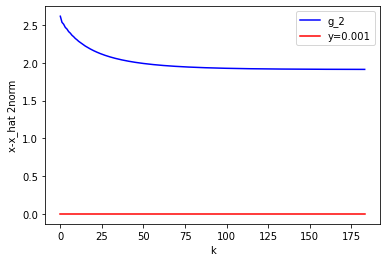

In [705]:
graph(gd)

## alpha=0.1

In [671]:
gd = gradient(_x0,w0,w1,past_x,0.1)

k=0,      x(k)=[1,1,1,1]
k=1,      x(k)=[0.98,0.98,0.98,0.98]
k=2,      x(k)=[0.9624,0.9804,0.9744,0.9584]
k=3,      x(k)=[0.9427,0.9824,0.9668,0.9433]
k=4,      x(k)=[0.9234,0.9866,0.9598,0.9295]
k=272,    x(k)=[0.0666,1.3366,0.4928,0.3251]
k=273,    x(k)=[0.0666,1.3366,0.4928,0.325]
k=274,    x(k)=[0.0665,1.3366,0.4927,0.325]
k=275,    x(k)=[0.0664,1.3367,0.4927,0.3249]
k=276,    x(k)=[0.0663,1.3367,0.4927,0.3249]


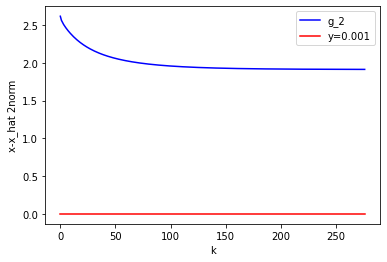

In [672]:
graph(gd)

## alpha=0.02

In [673]:
gd = gradient(_x0,w0,w1,past_x,0.02)

k=0,      x(k)=[1,1,1,1]
k=1,      x(k)=[0.996,0.996,0.996,0.996]
k=2,      x(k)=[0.9921,0.9928,0.9926,0.9919]
k=3,      x(k)=[0.9883,0.9903,0.9896,0.9879]
k=4,      x(k)=[0.9844,0.9883,0.987,0.9839]
k=1385,    x(k)=[0.0664,1.3367,0.4927,0.3249]
k=1386,    x(k)=[0.0664,1.3367,0.4927,0.3249]
k=1387,    x(k)=[0.0664,1.3367,0.4927,0.3249]
k=1388,    x(k)=[0.0664,1.3367,0.4927,0.3249]
k=1389,    x(k)=[0.0664,1.3367,0.4927,0.3249]


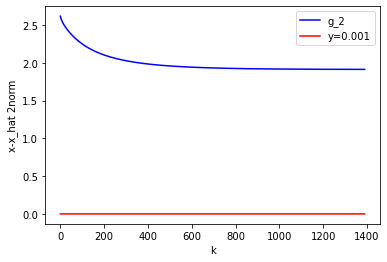

In [674]:
graph(gd)

## alpha=0.01

In [675]:
gd = gradient(_x0,w0,w1,past_x,0.01)

k=0,      x(k)=[1,1,1,1]
k=1,      x(k)=[0.998,0.998,0.998,0.998]
k=2,      x(k)=[0.996,0.9962,0.9961,0.996]
k=3,      x(k)=[0.9941,0.9946,0.9944,0.994]
k=4,      x(k)=[0.9921,0.9932,0.9928,0.9919]
k=2777,    x(k)=[0.0664,1.3367,0.4927,0.3249]
k=2778,    x(k)=[0.0664,1.3367,0.4927,0.3249]
k=2779,    x(k)=[0.0664,1.3367,0.4927,0.3249]
k=2780,    x(k)=[0.0664,1.3367,0.4927,0.3249]
k=2781,    x(k)=[0.0664,1.3367,0.4927,0.3249]


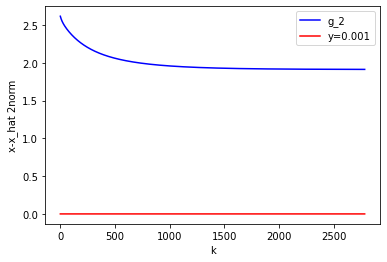

In [676]:
graph(gd)

## alpha=0.001

In [677]:
gd = gradient(_x0,w0,w1,past_x,0.001)

k=0,      x(k)=[1,1,1,1]
k=1,      x(k)=[0.9998,0.9998,0.9998,0.9998]
k=2,      x(k)=[0.9996,0.9996,0.9996,0.9996]
k=3,      x(k)=[0.9994,0.9994,0.9994,0.9994]
k=4,      x(k)=[0.9992,0.9992,0.9992,0.9992]
k=9996,    x(k)=[0.1873,1.2849,0.5618,0.4113]
k=9997,    x(k)=[0.1873,1.2849,0.5618,0.4113]
k=9998,    x(k)=[0.1873,1.2849,0.5618,0.4113]
k=9999,    x(k)=[0.1873,1.2849,0.5618,0.4112]
k=10000,    x(k)=[0.1872,1.2849,0.5617,0.4112]


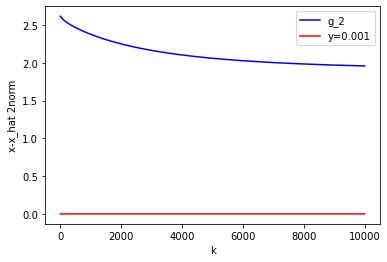

In [678]:
graph(gd)

## alpha=0.0001

In [679]:
gd = gradient(_x0,w0,w1,past_x,0.0001)

k=0,      x(k)=[1,1,1,1]
k=1,      x(k)=[1.0,1.0,1.0,1.0]
k=2,      x(k)=[1.0,1.0,1.0,1.0]
k=3,      x(k)=[0.9999,0.9999,0.9999,0.9999]
k=4,      x(k)=[0.9999,0.9999,0.9999,0.9999]
k=9996,    x(k)=[0.8205,1.02,0.9147,0.8604]
k=9997,    x(k)=[0.8205,1.02,0.9147,0.8603]
k=9998,    x(k)=[0.8205,1.02,0.9147,0.8603]
k=9999,    x(k)=[0.8205,1.02,0.9147,0.8603]
k=10000,    x(k)=[0.8205,1.02,0.9147,0.8603]


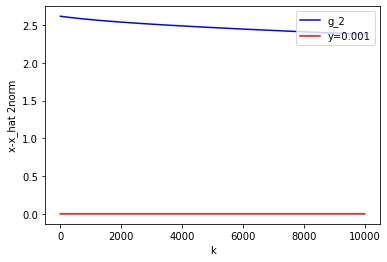

In [680]:
graph(gd)

## alpha=0.00001

In [681]:
gd = gradient(_x0,w0,w1,past_x,0.00001)

k=0,      x(k)=[1,1,1,1]
k=1,      x(k)=[1.0,1.0,1.0,1.0]
k=2,      x(k)=[1.0,1.0,1.0,1.0]
k=3,      x(k)=[1.0,1.0,1.0,1.0]
k=4,      x(k)=[1.0,1.0,1.0,1.0]
k=9996,    x(k)=[0.9807,0.9877,0.9851,0.9801]
k=9997,    x(k)=[0.9807,0.9877,0.9851,0.9801]
k=9998,    x(k)=[0.9807,0.9877,0.9851,0.9801]
k=9999,    x(k)=[0.9807,0.9877,0.9851,0.9801]
k=10000,    x(k)=[0.9807,0.9877,0.9851,0.9801]


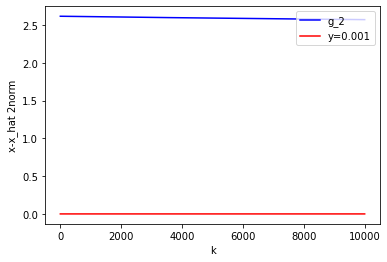

In [682]:
graph(gd)

## alpha=0.000001

In [683]:
gd = gradient(_x0,w0,w1,past_x,0.000001)

k=0,      x(k)=[1,1,1,1]
k=1,      x(k)=[1.0,1.0,1.0,1.0]
k=2,      x(k)=[1.0,1.0,1.0,1.0]
k=3,      x(k)=[1.0,1.0,1.0,1.0]
k=4,      x(k)=[1.0,1.0,1.0,1.0]
k=9996,    x(k)=[0.998,0.9981,0.9981,0.998]
k=9997,    x(k)=[0.998,0.9981,0.9981,0.998]
k=9998,    x(k)=[0.998,0.9981,0.9981,0.998]
k=9999,    x(k)=[0.998,0.9981,0.9981,0.998]
k=10000,    x(k)=[0.998,0.9981,0.9981,0.998]


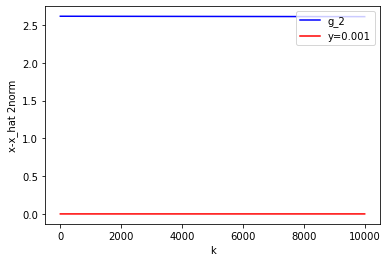

In [684]:
graph(gd)

## alpha=0.0000001

In [685]:
gd = gradient(_x0,w0,w1,past_x,0.0000001)

k=0,      x(k)=[1,1,1,1]
k=1,      x(k)=[1.0,1.0,1.0,1.0]
k=2,      x(k)=[1.0,1.0,1.0,1.0]
k=3,      x(k)=[1.0,1.0,1.0,1.0]
k=4,      x(k)=[1.0,1.0,1.0,1.0]
k=9996,    x(k)=[0.9998,0.9998,0.9998,0.9998]
k=9997,    x(k)=[0.9998,0.9998,0.9998,0.9998]
k=9998,    x(k)=[0.9998,0.9998,0.9998,0.9998]
k=9999,    x(k)=[0.9998,0.9998,0.9998,0.9998]
k=10000,    x(k)=[0.9998,0.9998,0.9998,0.9998]


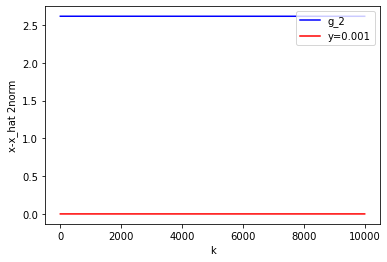

In [686]:
graph(gd)

### Comment on your results. What effect does changing the step-size have? What would you expect as you take the step-size to be increasingly large (α = 10 for example).

#### alpha가 너무 커도문제 너무 작아도 문제 ...
#### If alpha are relatively small such as  0.0000001, 0.000001, 0.00001, the value of y doesn't change much.
#### But if alpha is relatively big such as 0.15, 0.1, 0.02, we can easily found that value of y is changed.
#### Thus, step size affect how fast it moves. If alpha is too small, it takes a long time to find the global minimum as it moves slowely.
#### In contrast, if it is too large such as when alpha is 10, it moves fast but may cannot found the global minimum. 
#### Because, the stepsize is too big, it skips the point that has global minimum.

## (e)

In [777]:
import pandas as pd
from sklearn.model_selection import train_test_split

In [778]:
data = pd.read_csv('CarSeats.csv')
data.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


## Remove categorical predictors

In [779]:
categorical_predictors = ['ShelveLoc','Urban','US']

numerical_data = data.drop(categorical_predictors, axis=1)

In [780]:
numerical_data.head()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
0,9.50,138,73,11,276,120,42,17
1,11.22,111,48,16,260,83,65,10
2,10.06,113,35,10,269,80,59,12
3,7.40,117,100,4,466,97,55,14
4,4.15,141,64,3,340,128,38,13


## Standardise the numerical_data

In [781]:
response = ['Sales']
predictors=[x for x in list(numerical_data.columns) if x not in response]
print(predictors)

['CompPrice', 'Income', 'Advertising', 'Population', 'Price', 'Age', 'Education']


In [782]:
mu = numerical_data[predictors].mean()
sigma = numerical_data[predictors].std() 

In [783]:
mu.head()

CompPrice      124.9750
Income          68.6575
Advertising      6.6350
Population     264.8400
Price          115.7950
dtype: float64

In [784]:
sigma.head()

CompPrice       15.334512
Income          27.986037
Advertising      6.650364
Population     147.376436
Price           23.676664
dtype: float64

In [785]:
numerical_data[predictors]=(numerical_data[predictors]-mu)/sigma

In [786]:
numerical_data[predictors].mean()

CompPrice      3.799738e-16
Income         3.608225e-17
Advertising    9.908740e-17
Population     2.109424e-16
Price         -4.725387e-17
Age            8.590351e-17
Education     -1.110223e-16
dtype: float64

In [787]:
numerical_data[predictors].std()

CompPrice      1.0
Income         1.0
Advertising    1.0
Population     1.0
Price          1.0
Age            1.0
Education      1.0
dtype: float64

In [788]:
numerical_data.head()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
0,9.50,0.849391,0.155167,0.656355,0.075724,0.177601,-0.698907,1.182968
1,11.22,-0.911343,-0.738136,1.408194,-0.032841,-1.385119,0.720820,-1.488250
2,10.06,-0.780918,-1.202653,0.505987,0.028227,-1.511826,0.350457,-0.725045
3,7.40,-0.520069,1.119934,-0.396219,1.364940,-0.793820,0.103547,0.038160
4,4.15,1.045028,-0.166422,-0.546587,0.509987,0.515486,-0.945816,-0.343442


# Next, center the target variable (sub- tract its mean).
## 이게 무슨 소리임

In [789]:
target_mean = numerical_data[response].mean()
numerical_data[response] = numerical_data[response]-target_mean
numerical_data[response].head()

,Sales
0,2.003675
1,3.723675
2,2.563675
3,-0.096325
4,-3.346325


## Devide the data set

In [790]:
X_train, X_test, Y_train, Y_test = train_test_split(numerical_data.iloc[:,1:], numerical_data.iloc[:,0], test_size=0.5, shuffle=False)

In [791]:
X_train.head()

,CompPrice,Income,Advertising,Population,Price,Age,Education
0,0.849391,0.155167,0.656355,0.075724,0.177601,-0.698907,1.182968
1,-0.911343,-0.738136,1.408194,-0.032841,-1.385119,0.720820,-1.488250
2,-0.780918,-1.202653,0.505987,0.028227,-1.511826,0.350457,-0.725045
3,-0.520069,1.119934,-0.396219,1.364940,-0.793820,0.103547,0.038160
4,1.045028,-0.166422,-0.546587,0.509987,0.515486,-0.945816,-0.343442


In [792]:
Y_train.head()

0    2.003675
1    3.723675
2    2.563675
3   -0.096325
4   -3.346325
Name: Sales, dtype: float64

In [793]:
X_test.head()

,CompPrice,Income,Advertising,Population,Price,Age,Education
200,1.240666,0.834077,-0.997690,0.571055,1.275729,0.535638,-0.725045
201,0.849391,0.512488,-0.997690,-0.853868,0.768901,0.041820,1.564570
202,-0.259219,0.333827,-0.396219,1.005317,0.599958,-0.451998,-1.488250
203,0.392905,0.476756,-0.997690,-0.901365,1.740321,-1.748270,0.038160
204,1.958002,0.405291,-0.997690,-0.188904,0.346544,-1.007543,0.038160


In [794]:
Y_test.head()

200   -1.936325
201   -1.556325
202   -3.396325
203   -5.446325
204    1.243675
Name: Sales, dtype: float64

from sklearn.preprocessing import StandardScaler

std_scaler = StandardScaler()
std_scaler.fit(X_train)
X_train_Scaled = std_scaler.transform(X_train)


X_train_Scaled.mean()
X_train_Scaled.std()

## (f)

### Explain why standardization of the features is necessary for ridge regression. What issues might you run into if you used Ridge without first standardizing?

If we don't standardise the data, then predictors are measured at different scales.

In other words, they do not contribute equally to the analysis so that we cannot predict the value accurately.
For example, if the predicter has big value compared to values of other predictors, then this predictor will be considered that  ... even if it acutally not.

Thus, we need to rescale the variables, to have an equal range and do the proper prediction.

Ridge regression regularize the linear regression by imposing a penalty on the size of coefficients. Thus the coefficients are shrunk toward zero and toward each other. But when this happens and if the independent variables does not have the same scale, the shrinking is not fair. Two independent variables with different scales will have different contributions to the penalized terms, because the penalized term is a sum of squares of all the coefficients. To avoid such kind of problems, very often, the independent variables are centered and scaled in order to have variance 1.

Ridge regression impose a penalty on 2norm of B. Thusm the B are shrunk toward zero 
If the predictors does not have the same scale, the shrinkage is not fair.
Because, two predictors with different scales will have different contribution to penalized terms.
Because the penalized term is a sum of squares of all the coefficients. To avoid 

Ridge regression impose a penalty on 2norm of B. So, if the predictors does not in the same scale, then the shrinkage will not fair. Because, predictors do not contribute equally to the analysis. so they won't have same contribution to penalized terms.
Thus, to avoid these kind of problems, we need to rescale the predictors to have an equal range. 

## (g)

In [798]:
X_train

,CompPrice,Income,Advertising,Population,Price,Age,Education
0,0.849391,0.155167,0.656355,0.075724,0.177601,-0.698907,1.182968
1,-0.911343,-0.738136,1.408194,-0.032841,-1.385119,0.720820,-1.488250
2,-0.780918,-1.202653,0.505987,0.028227,-1.511826,0.350457,-0.725045
3,-0.520069,1.119934,-0.396219,1.364940,-0.793820,0.103547,0.038160
4,1.045028,-0.166422,-0.546587,0.509987,0.515486,-0.945816,-0.343442
...,...,...,...,...,...,...,...
195,-0.520069,0.869809,-0.396219,1.052814,-0.160284,0.782547,-1.106647
196,0.327692,-1.452778,-0.095483,0.984961,0.726665,1.152911,0.801365
197,-0.063582,-0.273619,-0.997690,0.462489,0.937843,1.399820,0.801365
198,-0.846131,0.405291,-0.245851,1.595642,0.515486,0.967729,-1.488250


In [800]:
X_transpose = X_train.T
X_transpose

,0,1,2,3,4,5,6,7,8,9,...,190,191,192,193,194,195,196,197,198,199
CompPrice,0.849391,-0.911343,-0.780918,-0.520069,1.045028,-0.063582,-0.650493,0.718966,0.458117,0.458117,...,0.327692,2.023214,-1.106980,0.914604,-0.846131,-0.520069,0.327692,-0.063582,-0.846131,-0.194007
Income,0.155167,-0.738136,-1.202653,1.119934,-0.166422,1.584451,1.298594,0.441024,1.477255,1.584451,...,-1.131189,-0.952529,-1.524242,0.047970,1.048469,0.869809,-1.452778,-0.273619,0.405291,0.691148
Advertising,0.656355,1.408194,0.505987,-0.396219,-0.546587,0.957090,-0.997690,1.257826,-0.997690,-0.997690,...,0.957090,0.957090,-0.997690,0.054884,1.708929,-0.396219,-0.095483,-0.997690,-0.245851,-0.245851
Population,0.075724,-0.032841,0.028227,1.364940,0.509987,1.602427,-1.491690,1.086741,-1.064214,-0.908151,...,0.218217,-0.643522,0.971390,-1.315271,1.466720,1.052814,0.984961,0.462489,1.595642,0.476060
Price,0.177601,-1.385119,-1.511826,-0.793820,0.515486,-1.849712,-0.329227,0.177601,0.346544,0.346544,...,-0.624877,2.416092,-0.962762,-0.836055,0.515486,-0.160284,0.726665,0.937843,0.515486,0.431015
Age,-0.698907,0.720820,0.350457,0.103547,-0.945816,1.523275,1.091184,0.844275,1.399820,1.399820,...,-1.007543,1.276366,0.165275,0.473911,-0.513725,0.782547,1.152911,1.399820,0.967729,0.659093
Education,1.182968,-1.488250,-0.725045,0.038160,-0.343442,0.801365,0.419763,-1.488250,-1.488250,1.182968,...,-0.343442,0.038160,0.038160,-1.488250,-1.106647,-1.106647,0.801365,0.801365,-1.488250,0.038160


In [801]:
Y_train

0      2.003675
1      3.723675
2      2.563675
3     -0.096325
4     -3.346325
         ...   
195   -3.306325
196   -3.396325
197   -4.976325
198   -3.876325
199   -1.076325
Name: Sales, Length: 200, dtype: float64

In [ ]:
#x_hat = np.linalg.inv(w1+0.2*np.identity(4))@A_transpose@b

In [803]:
B_ridge = np.linalg.inv(X_transpose@X_train + 0.5*np.identity(7))@X_transpose@Y_train
B_ridge

0    1.676980
1    0.369168
2    1.111140
3    0.020831
4   -2.324269
5   -0.520046
6   -0.149468
dtype: float64

## (h)

In [ ]:
#Loss_Function = (np.linalg.norm(Y_train-X_train@B, ord = 2)**2 + 0.5*np.linalg.norm(B, ord=2)**2)/n

In [954]:
X_ = X_train.values.reshape(200,7)
X_

array([[ 0.84939126,  0.15516667,  0.65635504, ...,  0.17760103,
        -0.69890695,  1.18296763],
       [-0.91134302, -0.73813596,  1.40819356, ..., -1.3851191 ,
         0.72082013, -1.4882496 ],
       [-0.78091826, -1.20265333,  0.50598733, ..., -1.51182614,
         0.35045654, -0.72504468],
       ...,
       [-0.06358207, -0.2736186 , -0.99768973, ...,  0.93784326,
         1.39982003,  0.80136517],
       [-0.84613064,  0.4052914 , -0.2458512 , ...,  0.51548646,
         0.96772918, -1.4882496 ],
       [-0.19400683,  0.69114824, -0.2458512 , ...,  0.43101511,
         0.65909286,  0.03816025]])

In [963]:
hat_loss = (np.linalg.norm(Y_train-X_@B_ridge, ord = 2 )**2 + 0.5*np.linalg.norm(B_ridge, ord = 2)**2) / 200
hat_loss

3.371593652803436

In [964]:
def loss_function(Y_train, X_, B):
    loss = (np.linalg.norm(Y_train-X_@B, ord = 2)**2 + 0.5*np.linalg.norm(B, ord=2)**2)/200
    return loss

In [1007]:
def find_B1(X_train, Y_train, alpha):
    sum = 0
    for i in range(0,200):
        X = X_train.loc[i]
        X_tr = X.T
        Y = Y_train.loc[i]
        drv = X*Y -X@X_tr
        sum = sum + drv

    B1 = 1+alpha * sum/100
    return B1
    

In [1011]:
B0 = pd.DataFrame({'CompPrice':[1],
                    'Income':[1],
                    'Advertising':[1],
                    'Population':[1],
                    'Price':[1],
                    'Age':[1],
                    'Education':[1]   
                  })
B0

,CompPrice,Income,Advertising,Population,Price,Age,Education
0,1,1,1,1,1,1,1


In [1013]:
sum = 0
for i in range(0,200):
    X = X_train.loc[i]
    X_tr = X.T
    Y = Y_train.loc[i]
    drv = X*Y -X@X_tr*B0
    sum = sum + drv

B1 = 1+alpha * sum/100
print(B1)

   CompPrice    Income  Advertising  Population     Price       Age  Education
0   0.869994  0.874004     0.880377    0.864494  0.835821  0.850453   0.859393


In [1008]:
B1 = find_B1(X_train, Y_train, 0.01)
B1

CompPrice      0.869994
Income         0.874004
Advertising    0.880377
Population     0.864494
Price          0.835821
Age            0.850453
Education      0.859393
dtype: float64

In [1006]:

l = loss_function(Y_train, X_, B1)
l

13.781273838499333

In [1000]:
def ridge_graph(Delta):
    k = np.arange(2,len(Delta)+2)  
    plt.plot(k, Delta, color='blue')      
    plt.xlabel("k")                                    
    plt.ylabel("Delta")
    plt.show()

# *********************************************
## k=0,1 일때 추가해주고 epoch = 1000 처리해줘야한다

In [1003]:

def find_B(X_train, Y_train, B, hat_loss, alpha):
    X_ = X_train.values.reshape(200,7)
    B = find_B1(X_train, Y_train, alpha)
    Delta = []
    
    #loss = loss_function(Y_train, X_, B)
    #delta = loss - hat_loss
    #Delta.append(delta)
    #print(delta)
    #print("\n\n")
    
    
    
    for j in range(2,4):
        sum = 0
        for i in range(0,200):
            X = X_train.loc[i]
            X_tr = X.T
            Y = Y_train.loc[i]
            drv = X*Y -X@X_tr*B
            sum = sum + drv
        
        B = 1+alpha * sum/100
        print("k={}".format(j))
        print(B)
        
        loss = loss_function(Y_train, X_, B)
        delta = loss - hat_loss
        Delta.append(delta)
        #print("delta is {}\n".format(delta))
        #print("\n\n")
    
    ridge_graph(Delta)
  
    

## α ∈ {0.000001, 0.000005, 0.00001, 0.00005, 0.0001, 0.0005, 0.001, 0.005, 0.01}

In [1004]:
find_B(X_train, Y_train, B, hat_loss, 0.01)

10.409680185695898



k=2
CompPrice      0.887796
Income         0.891257
Advertising    0.896757
Population     0.883049
Price          0.858302
Age            0.870931
Education      0.878647
dtype: float64
k=3
CompPrice      0.885358
Income         0.888895
Advertising    0.894514
Population     0.880508
Price          0.855224
Age            0.868127
Education      0.876010
dtype: float64


In [927]:
alphas = [0.000001, 0.000005, 0.00001, 0.00005, 0.0001, 0.0005, 0.001, 0.005, 0.01]
alphas

[1e-06, 5e-06, 1e-05, 5e-05, 0.0001, 0.0005, 0.001, 0.005, 0.01]

*******************
alpha is 1e-06
k=2
CompPrice      0.999987
Income         0.999987
Advertising    0.999988
Population     0.999986
Price          0.999984
Age            0.999985
Education      0.999986
dtype: float64
k=3
CompPrice      0.999987
Income         0.999987
Advertising    0.999988
Population     0.999986
Price          0.999984
Age            0.999985
Education      0.999986
dtype: float64


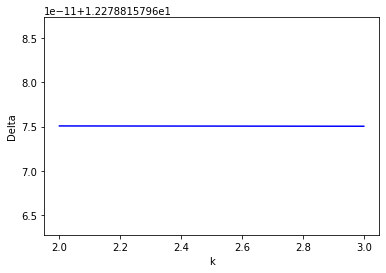

*******************
alpha is 5e-06
k=2
CompPrice      0.999935
Income         0.999937
Advertising    0.999940
Population     0.999932
Price          0.999918
Age            0.999925
Education      0.999930
dtype: float64
k=3
CompPrice      0.999935
Income         0.999937
Advertising    0.999940
Population     0.999932
Price          0.999918
Age            0.999925
Education      0.999930
dtype: float64


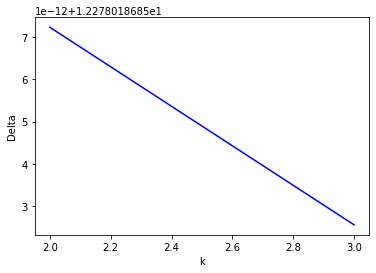

*******************
alpha is 1e-05
k=2
CompPrice      0.999870
Income         0.999874
Advertising    0.999880
Population     0.999865
Price          0.999836
Age            0.999850
Education      0.999859
dtype: float64
k=3
CompPrice      0.999870
Income         0.999874
Advertising    0.999880
Population     0.999865
Price          0.999836
Age            0.999850
Education      0.999859
dtype: float64


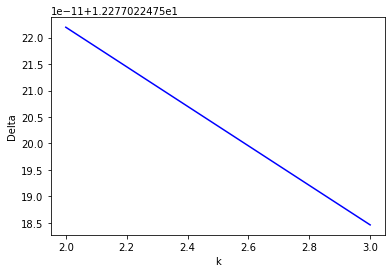

*******************
alpha is 5e-05
k=2
CompPrice      0.999350
Income         0.999370
Advertising    0.999402
Population     0.999323
Price          0.999180
Age            0.999253
Education      0.999297
dtype: float64
k=3
CompPrice      0.999350
Income         0.999370
Advertising    0.999402
Population     0.999323
Price          0.999180
Age            0.999253
Education      0.999297
dtype: float64


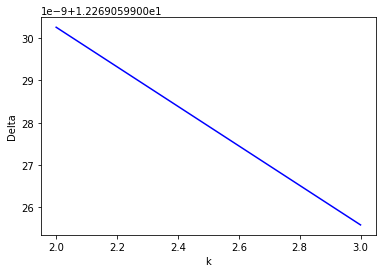

*******************
alpha is 0.0001
k=2
CompPrice      0.998702
Income         0.998742
Advertising    0.998805
Population     0.998647
Price          0.998360
Age            0.998507
Education      0.998596
dtype: float64
k=3
CompPrice      0.998702
Income         0.998742
Advertising    0.998805
Population     0.998647
Price          0.998360
Age            0.998507
Education      0.998596
dtype: float64


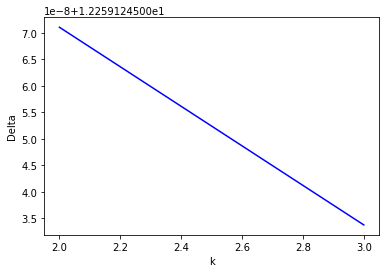

*******************
alpha is 0.0005
k=2
CompPrice      0.993544
Income         0.993743
Advertising    0.994060
Population     0.993271
Price          0.991847
Age            0.992574
Education      0.993018
dtype: float64
k=3
CompPrice      0.993544
Income         0.993743
Advertising    0.994060
Population     0.993271
Price          0.991847
Age            0.992573
Education      0.993017
dtype: float64


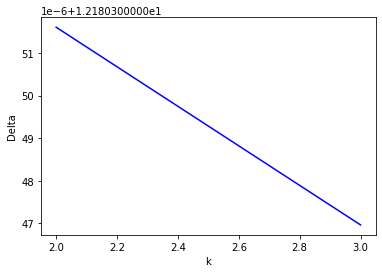

*******************
alpha is 0.001
k=2
CompPrice      0.987177
Income         0.987573
Advertising    0.988201
Population     0.986635
Price          0.983807
Age            0.985250
Education      0.986132
dtype: float64
k=3
CompPrice      0.987175
Income         0.987571
Advertising    0.988199
Population     0.986632
Price          0.983804
Age            0.985247
Education      0.986129
dtype: float64


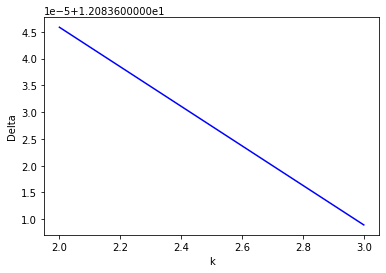

*******************
alpha is 0.005
k=2
CompPrice      0.939448
Income         0.941315
Advertising    0.944283
Population     0.936886
Price          0.923531
Age            0.930346
Education      0.934510
dtype: float64
k=3
CompPrice      0.939143
Income         0.941020
Advertising    0.944003
Population     0.936568
Price          0.923146
Age            0.929995
Education      0.934180
dtype: float64


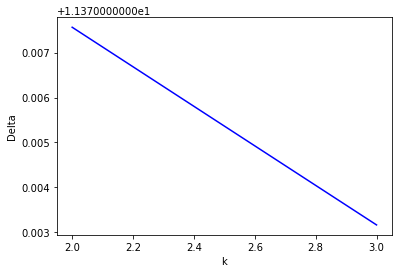

*******************
alpha is 0.01
k=2
CompPrice      0.887796
Income         0.891257
Advertising    0.896757
Population     0.883049
Price          0.858302
Age            0.870931
Education      0.878647
dtype: float64
k=3
CompPrice      0.885358
Income         0.888895
Advertising    0.894514
Population     0.880508
Price          0.855224
Age            0.868127
Education      0.876010
dtype: float64


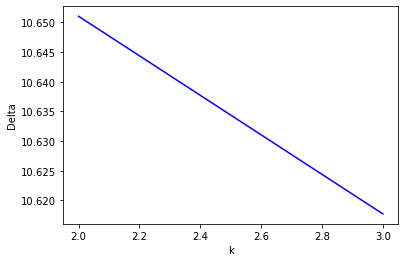

In [996]:
for i in alphas:
    alpha = i
    print("*******************")
    print("alpha is {}".format(alpha))
    find_B(X_train, Y_train, B, hat_loss, alpha)
    

array([2, 3])